### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
# Find out columns that have null values
null_counts = data.isnull().sum()
null_columns = null_counts[null_counts > 0].sort_values(ascending=False)
print (null_columns)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64


**Observation**:
The "car" column contains substantial missing data and may not be valuable for our analysis. While the "bar" and "CoffeeHouse" columns include null or NaN values, the remaining columns offer sufficient meaningful data for analysis.

3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
# Drop the car Column
data = data.drop(columns=['car'])

**Decision**: The "car" column contains insufficient data for meaningful analysis and will be excluded from our study. We will focus on the "Bar," "CoffeeHouse," "CarryAway," and "Restaurant" columns for our data analysis.

4. What proportion of the total observations chose to accept the coupon?



In [20]:

# Compute the proportion, by calculating the mean of acceptance data i.e column 'Y'
proportion_accepted = data['Y'].mean() * 100

print(f"Proportion of accepted coupons: {proportion_accepted:.2f}%")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

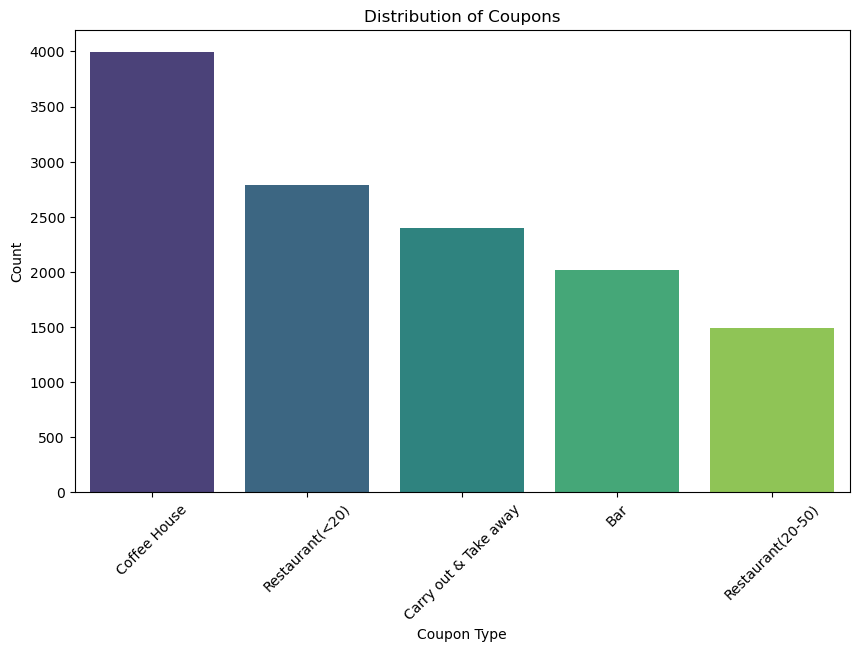

In [24]:
# Count the coupons by value
coupons = data['coupon'].value_counts().reset_index()

# Rename the columns for better readability
coupons.columns = ['coupon', 'count']

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='coupon', y='count', hue='coupon', data=coupons, palette='viridis')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("./images/plots/distribution_of_coupons.png")
plt.show()

**Conclusion**:
With nearly 4000 coffee house coupons issued, this dataset provides a robust foundation for analysis. Restaurant and carryout have a good amount of data to analyze as well. In contrast, the limited number of high-end restaurant coupons restricts our ability to draw meaningful conclusions about their acceptance rate.

6. Use a histogram to visualize the temperature column.

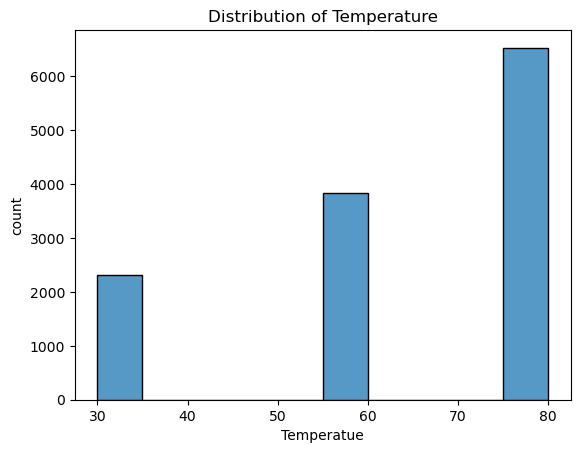

In [27]:
# Plot using Seaborn's histplot
sns.histplot(data=data, x='temperature', bins = 10)
plt.xlabel('Temperatue')
plt.ylabel('count')
plt.title('Distribution of Temperature')
plt.show()

**Conclusion**:
While the limited temperature categories might restrict the depth of our analysis, a visualization can still provide valuable insights.
A bar chart comparing the coupon acceptance rate for each temperature category would be appropriate. This will allow us to quickly identify potential trends or disparities in coupon acceptance based on temperature.

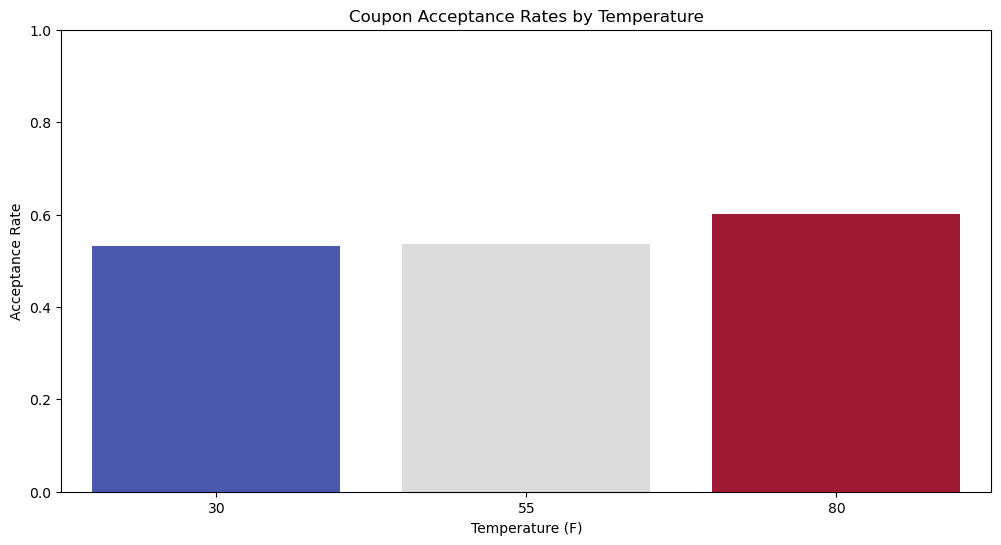

In [30]:
# Grouping the data by temperature and calculating the acceptance rates
temperature_acceptance = data.groupby('temperature')['Y'].mean().reset_index()

# Plotting the acceptance rates by temperature
plt.figure(figsize=(12, 6))
sns.barplot(x='temperature', y='Y', hue='temperature', data=temperature_acceptance, legend=False, palette='coolwarm')
plt.title('Coupon Acceptance Rates by Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

**Conclusion**:
Based on the analysis, it appears that temperature does not significantly influence coupon acceptance rates in this dataset.
Given this finding, we can focus our attention on other variables that might be more predictive of coupon acceptance behavior.

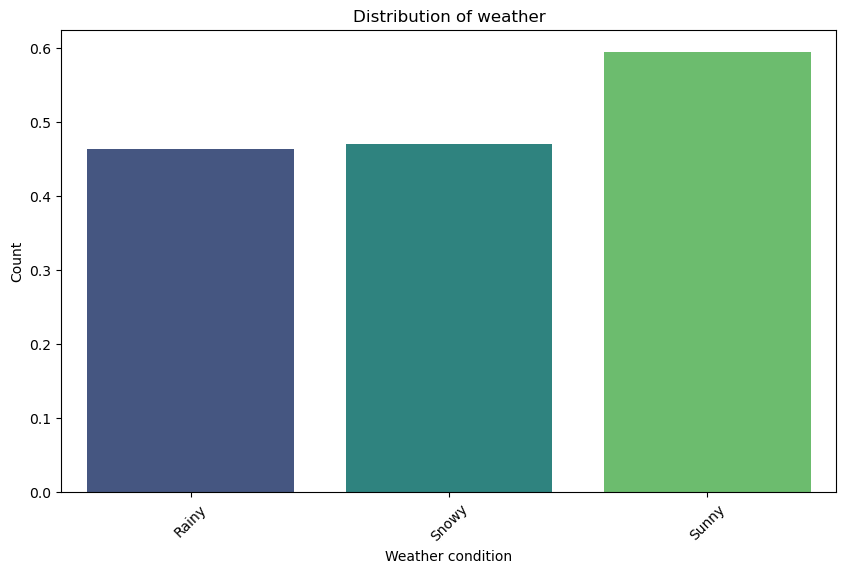

In [33]:
# Let's see in which weather the drive accepts the token the most

# Group by weather and calculate the acceptance ratio
weather_data = data.groupby('weather')['Y'].mean().reset_index()
weather_data.columns = ['weather', 'count']

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', hue='weather', legend=False, data=weather_data, palette='viridis')
plt.title('Distribution of weather')
plt.xlabel('Weather condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Conclusion** : Given the minimal impact of weather on coupon acceptance, it's prudent to explore other potential factors.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [38]:
# Compute the proportion of accepted bar coupons
proportion_accepted = bar_coupons['Y'].mean()

print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f} ")

Proportion of accepted bar coupons: 0.41 


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [41]:
# Create a new dataframe with just drivers who got the Bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Define a function to categorize bar visits 
def categorize_bar_visits(frequency):
    if frequency in ['never', 'less1', '1~3']:
        return '3 or fewer times'
    else:
        return 'More than 3 times'

# categorize the bar visit frequency to a new column 'bar_visit_frequency'
def categorize_and_assign(row):
    row['bar_visit_frequency'] = categorize_bar_visits(row['Bar'])
    return row

bar_coupons = bar_coupons.apply(categorize_and_assign, axis=1)

# Compute the acceptance ratio by frequency to bar
not_frequent_to_bar = bar_coupons[bar_coupons['bar_visit_frequency'] == '3 or fewer times']['Y'].mean() * 100
frequent_to_bar = bar_coupons[bar_coupons['bar_visit_frequency'] == 'More than 3 times']['Y'].mean() * 100

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 times or fewer {not_frequent_to_bar:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times {frequent_to_bar:.2f}")


Acceptance rate for those who went to a bar 3 times or fewer 37.06
Acceptance rate for those who went to a bar more than 3 times 73.18


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
bar_coupons = data[data['coupon'] == 'Bar']

# We need to clean up the age data in the dataset because the age has non numeric values like 'Over50' 'below21'.
# We will map over50 to 51 and below21 to 20 so we can make the numeric comparison.

def convert_to_int(value):
    if value == 'over50':
        return 51
    if value == 'below21':
        return 20
    try:
        return int(value)
    except ValueError:
        return None  # 

def fix_type(row):
    row['age_as_int'] = convert_to_int(row['age'])
    return row

bar_coupons = bar_coupons.apply(fix_type, axis=1)

# Define a function to categorize bar visits
def categorize_bar_visits(frequency):
    if frequency in ['never', 'less1']:
        return 'less than 1'
    else:
        return 'More than 1 times'

# categorize the bar visit frequency to a new column 'bar_visit_frequency'

def categorize_and_assign(row):
    row['bar_visit_frequency'] = categorize_bar_visits(row['Bar'])
    return row

bar_coupons = bar_coupons.apply(categorize_and_assign, axis=1)

# define the condition as a variable so we can use ~ to get all others.
condition = (bar_coupons['bar_visit_frequency'] == 'More than 1 times') & (bar_coupons['age_as_int'] > 25)


# Calculate the acceptance ratios
over_25_acceptance_rate = bar_coupons[condition]['Y'].mean() * 100
others_acceptance_rate = bar_coupons[~condition]['Y'].mean() * 100

# Print the acceptance ratios
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {over_25_acceptance_rate:.2f}")
print(f"Acceptance rate for all other drivers: {others_acceptance_rate:.2f}")

# Compare the acceptance ratios
if over_25_acceptance_rate > others_acceptance_rate:
    print("Drivers who go to a bar more than once a month and are over the age of 25 have a higher acceptance rate.")
else:
    print("All other drivers have a higher acceptance rate.")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.46
Acceptance rate for all other drivers: 34.81
Drivers who go to a bar more than once a month and are over the age of 25 have a higher acceptance rate.


**Conclusion**: Driver who goes to bar atleast once is more likely to accept the bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [46]:

# define the criteria to select the drivers
criteria = (bar_coupons['bar_visit_frequency'] == 'More than 1 times') & (bar_coupons['passanger'] !=  'Kid(s)') & (bar_coupons['occupation'] != 'Farming Fishing & Forestry')

# Calculate the acceptance rate
without_kids_acceptance_rate = bar_coupons[criteria]['Y'].mean() * 100
others_acceptance_rate = bar_coupons[~criteria]['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month and travel without kids and not work in farming, etc: {without_kids_acceptance_rate:.2f}")
print(f"Acceptance rate for all other drivers: {others_acceptance_rate:.2f}")

# Compare the acceptance rates
if without_kids_acceptance_rate > others_acceptance_rate:
    print("Drivers who go to a bar more than once a month and travel without kids have a higher acceptance rate.")
else:
    print("All other drivers have a higher acceptance rate.")


Acceptance rate for drivers who go to a bar more than once a month and travel without kids and not work in farming, etc: 70.30
Acceptance rate for all other drivers: 29.49
Drivers who go to a bar more than once a month and travel without kids have a higher acceptance rate.


**Conclusion**:  Drivers who go to a bar more than once a month and travel without kids have a higher acceptance rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [49]:
# Lets create criteria for each condition so its easy to understand and maintain.
criteria1a = (bar_coupons['bar_visit_frequency'] == 'More than 1 times') & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')
criteria1b = (bar_coupons['bar_visit_frequency'] == 'More than 1 times') & (bar_coupons['age_as_int'] < 30)
criteria1c = (bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8'])) & (bar_coupons['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999']))
criteria = (criteria1a | criteria1b | criteria1c)

#Apply the criteria on the data set
drivers_with_conditions_applied = bar_coupons[criteria]['Y'].mean() * 100
other_drivers = bar_coupons[~criteria]['Y'].mean() * 100

print(drivers_with_conditions_applied)
print(other_drivers)

if drivers_with_conditions_applied > other_drivers:
    print(f"Drivers who satisfy one of the condition has higher acceptance rate: {drivers_with_conditions_applied:.2f}")
else:
    print(f"Drivers who does not satisfy the condition has higher acceptance rate: {other_drivers:.2f}")
                

61.02841677943166
29.42097026604069
Drivers who satisfy one of the condition has higher acceptance rate: 61.03


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Conclusion**: Based on the analysis, I have found a correlation between:

**Driver's acceptance of bar coupons**: This indicates a preference or potential interest in bar-related establishments.

**Frequent bar visits**: Drivers who accept coupons are more likely to visit bars regularly.

**Absence of children as passengers**: Drivers who accepted coupons are less likely to have child passengers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

                  coupon  count  accepted  acceptance_rate
0                    Bar   2017       827         0.410015
1  Carry out & Take away   2393      1760         0.735478
2           Coffee House   3996      1995         0.499249
3      Restaurant(20-50)   1492       658         0.441019
4        Restaurant(<20)   2786      1970         0.707107


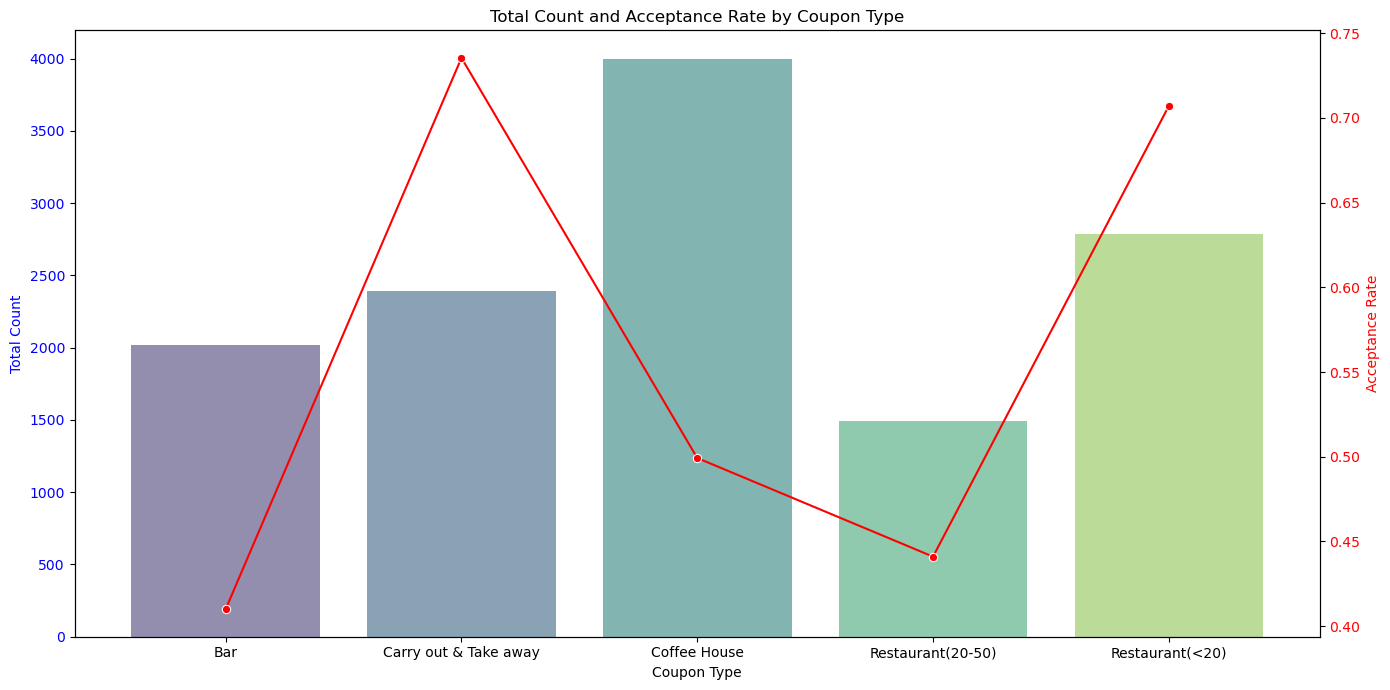

In [52]:
# Group the data by coupon and calculate the acceptance ratio for each group
grouped = data.groupby('coupon').agg(
    count=('Y', 'size'),
    accepted=('Y', 'sum'),
    acceptance_rate=('Y', 'mean')
).reset_index()

print(grouped)

# Replace infinite values (positive and negative) with NaN in the DataFrame
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='coupon', y='count', hue='coupon', data=grouped, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='coupon', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by Coupon Type')
ax1.set_xlabel('Coupon Type')

# Show the plot
plt.tight_layout()
plt.savefig("./images/plots/acceptance_rate_by_coupon.png")
plt.show()


**Observation**:
The plot indicates that approximately four thousand drivers received coffee house coupons, with a corresponding acceptance rate of roughly fifty percent. In contrast, carryout and takeaway coupons exhibited a higher acceptance rate of seventy-three percent, while less expensive restaurant coupons demonstrated a seventy percent acceptance rate. A more in-depth analysis of the less expensive restaurant dataset would be beneficial.

Lets explore the Restaurant (<20) data

In [55]:
# Lets get the drivers who accepted the Restaurant coupons
restaurant_coupons = data[data['coupon'] == 'Restaurant(<20)']

In [57]:
# What is the acceptance ratio for less expensive Restaurant coupons
print(f"Acceptance ratio for less expensive restaurant coupons: {restaurant_coupons['Y'].mean() * 100 :.2f}%")

Acceptance ratio for less expensive restaurant coupons: 70.71%


       Age  Acceptance Ratio
0       21          0.741652
1       26          0.730838
2       31          0.705357
3       36          0.651877
4       41          0.708502
5       46          0.756757
6   50plus          0.637755
7  below21          0.734375


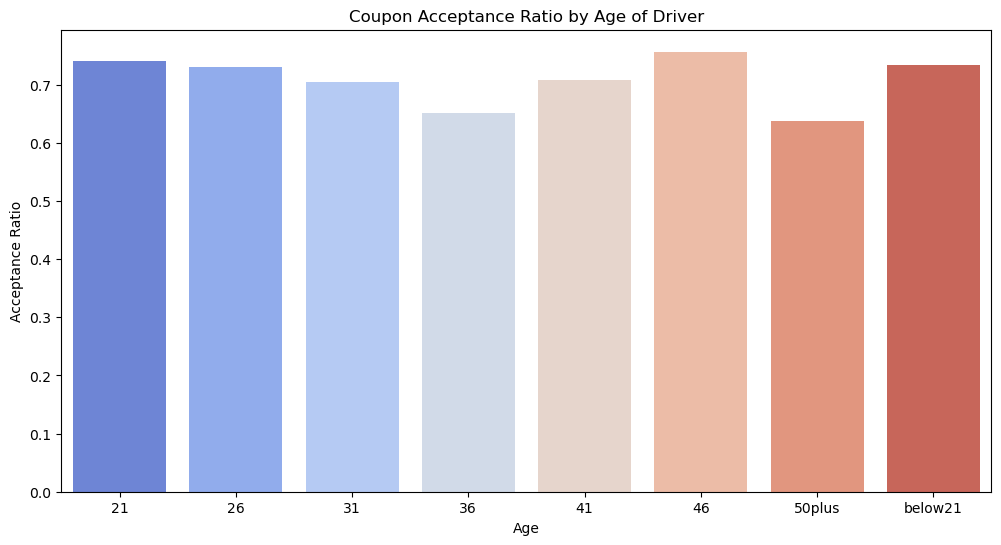

In [59]:
# What is the acceptance ratio of drivers by age

# Group the drivers by age and calculate acceptance ratio
age_acceptance_ratio = restaurant_coupons.groupby('age')['Y'].mean().reset_index()

# Rename columns for clarity
age_acceptance_ratio.columns = ['Age', 'Acceptance Ratio']

# Display the acceptance ratio by age
print(age_acceptance_ratio)

# Plot the acceptance ratio by age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Acceptance Ratio', hue='Age', data=age_acceptance_ratio, palette='coolwarm')
plt.title('Coupon Acceptance Ratio by Age of Driver')
plt.xlabel('Age')
plt.ylabel('Acceptance Ratio')
plt.savefig("images/plots/age_acceptance_ratio.png")
plt.show()

**conclusion**: Based on the above data set, there appears to be a weak negative correlation between driver age and coupon acceptance rate. Younger drivers (under 30) tend to have slightly higher acceptance rates compared to older drivers (above 50). There is no strong correlation between driver's age and coupon acceptance rate.

In [62]:
# Gender

# group and calculate the acceptance rate
gender_acceptance_ratio = restaurant_coupons.groupby('gender')['Y'].mean().reset_index()

# Rename columns for clarity
gender_acceptance_ratio.columns = ['Gender', 'Acceptance Ratio']

# print the acceptance ratio by gender
print(f"\n\nAcceptance ration by Gender: \n{gender_acceptance_ratio}")

# Parental Status i.e has children or not

# group and calculate the acceptance rate
parental_status_acceptance_ratio = restaurant_coupons.groupby('has_children')['Y'].mean().reset_index()

# Rename columns for clarity
parental_status_acceptance_ratio.columns = ['Has Children', 'Acceptance Ratio']

# Display the acceptance ratio by parental status 
print(f"\n\nAcceptance ration by Parental status:\n{parental_status_acceptance_ratio}")

# Marital Status (Single, married, divorced, widowed)

# group and calculate the acceptance rate
marital_status_acceptance_ratio = restaurant_coupons.groupby('maritalStatus')['Y'].mean().reset_index()

# Rename columns for clarity
marital_status_acceptance_ratio.columns = ['Marital Status', 'Acceptance Ratio']

# Display the acceptance ratio by Marital status
print(f"\n\nAcceptance ration by Marital status:\n {marital_status_acceptance_ratio}")




Acceptance ration by Gender: 
   Gender  Acceptance Ratio
0  Female          0.696692
1    Male          0.717949


Acceptance ration by Parental status:
   Has Children  Acceptance Ratio
0             0          0.714548
1             1          0.696522


Acceptance ration by Marital status:
       Marital Status  Acceptance Ratio
0           Divorced          0.633333
1    Married partner          0.689902
2             Single          0.729885
3  Unmarried partner          0.725738
4            Widowed          0.551724


**Conclusion**: There is no discernible difference in coupon acceptance rates based on driver gender, marital status, or parental status. We will explore other attributes, such as passenger demographics, for potential correlations.

   passanger  count  accepted  acceptance_rate
0      Alone   1435       916         0.638328
1  Friend(s)    826       662         0.801453
2     Kid(s)    267       193         0.722846
3    Partner    258       199         0.771318


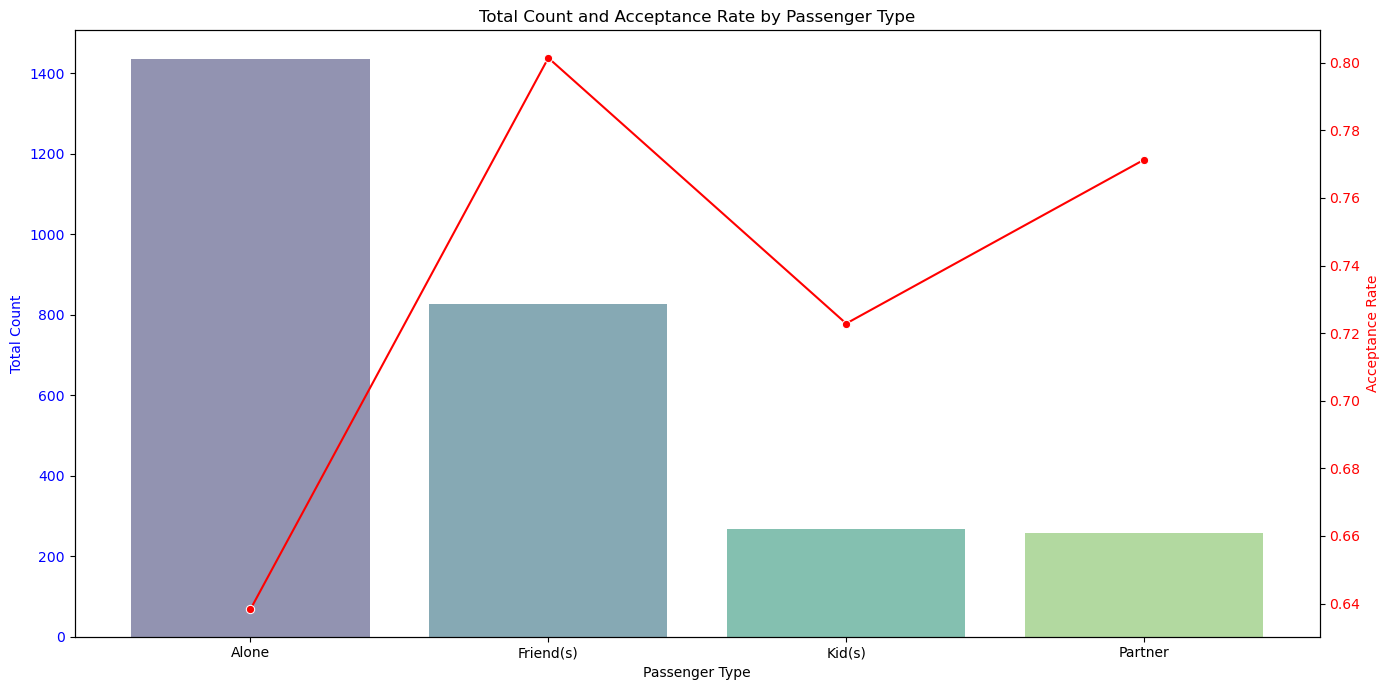

In [65]:
# Group the driver by passenger and calculate the acceptance ratio for each group
grouped = restaurant_coupons.groupby('passanger').agg(
    count=('Y', 'size'),
    accepted=('Y', 'sum'),
    acceptance_rate=('Y', 'mean')
).reset_index()

print(grouped)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='passanger', y='count', hue='passanger', data=grouped, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='passanger', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by Passenger Type')
ax1.set_xlabel('Passenger Type')

plt.savefig("images/plots/acceptance_rate_by_pass_type.png")
# Show the plot
plt.tight_layout()
plt.show()


**Conclusion**: Drivers who are traveling with friends will most likely accepting the coupon.

Lets see if the time of day matters in accepting the restaurant coupons

   time  time_mapping  count  accepted  acceptance_rate
0  10AM             2    303       215         0.709571
1  10PM             5    465       235         0.505376
2   2PM             3    697       567         0.813486
3   6PM             4    748       619         0.827540
4   7AM             1    573       334         0.582897


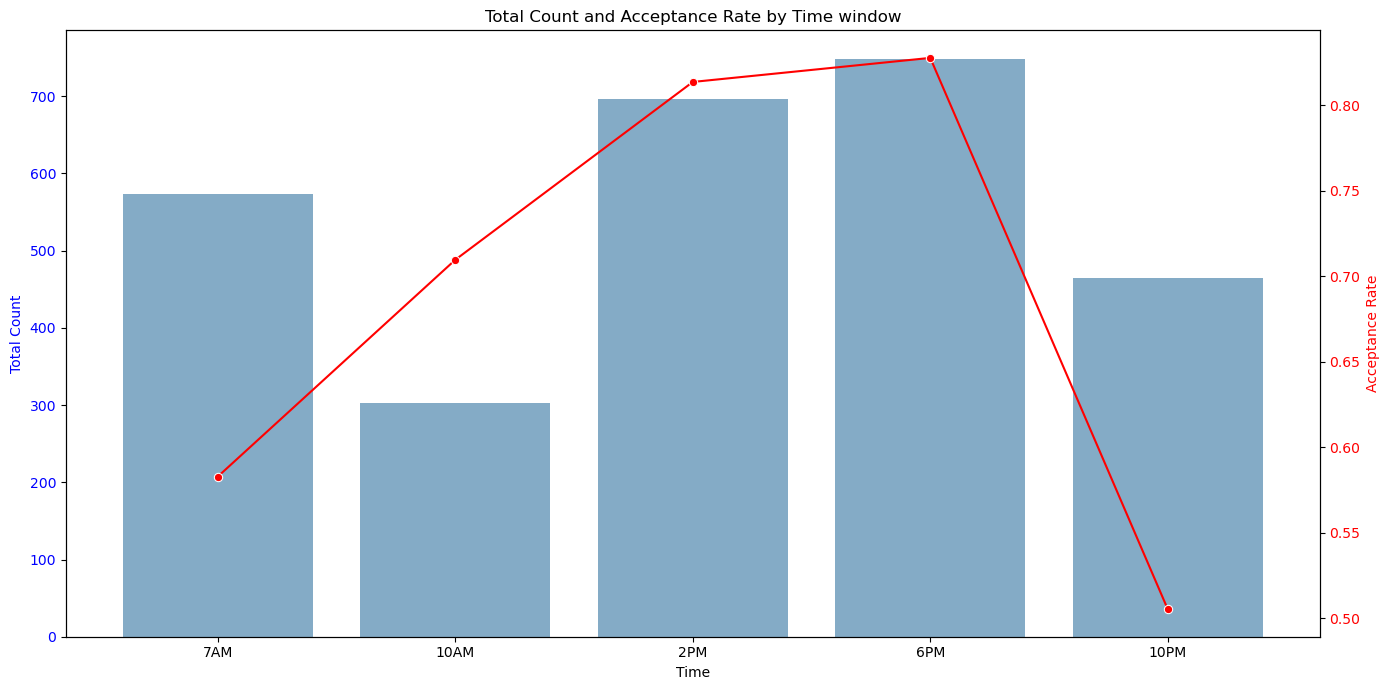

In [68]:
# The time by default is not in sorted order and it is skewing the plot's readability, so lets sort the time in order to properly plot.
time_mapping = {
    '7AM' : 1,
    '10AM': 2,
    '2PM' : 3,
    '6PM' : 4,
    '10PM': 5
}
# map time values to corresponding time categories
restaurant_coupons = restaurant_coupons.assign(time_mapping=restaurant_coupons['time'].map(time_mapping))

grouped = restaurant_coupons.groupby(['time', 'time_mapping']).agg(
    count=('Y', 'size'),
    accepted=('Y', 'sum'),
    acceptance_rate=('Y', 'mean')
).reset_index()

print(grouped)
grouped = grouped.sort_values('time_mapping')

# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='time', y='count', data=grouped, ax=ax1, alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='time', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by Time window')
ax1.set_xlabel('Time')
plt.savefig("./images/plots/acceptance_rate_by_time.png")
# Show the plot
plt.tight_layout()
plt.show()


**Conclusion**: Drivers are more likely to accept restaurant coupons when they are received between 10 AM and 6 PM. The acceptance rate is particularly high during the afternoon hours of 2 PM to 6 PM.


**Summary**:
Less expensive restaurant coupons distributed to drivers accompanied by friends or partners between the hours of 10 AM and 6 PM demonstrate a higher probability of acceptance

             income  income_numeric  count  accepted  acceptance_rate
0   $100000 or More               9    209       102         0.488038
1   $12500 - $24999               2    205        78         0.380488
2   $25000 - $37499               3    227       116         0.511013
3   $37500 - $49999               4    211        92         0.436019
4   $50000 - $62499               5    201       100         0.497512
5   $62500 - $74999               6     96        35         0.364583
6   $75000 - $87499               7    109        49         0.449541
7   $87500 - $99999               8    109        41         0.376147
8  Less than $12500               1    125        45         0.360000


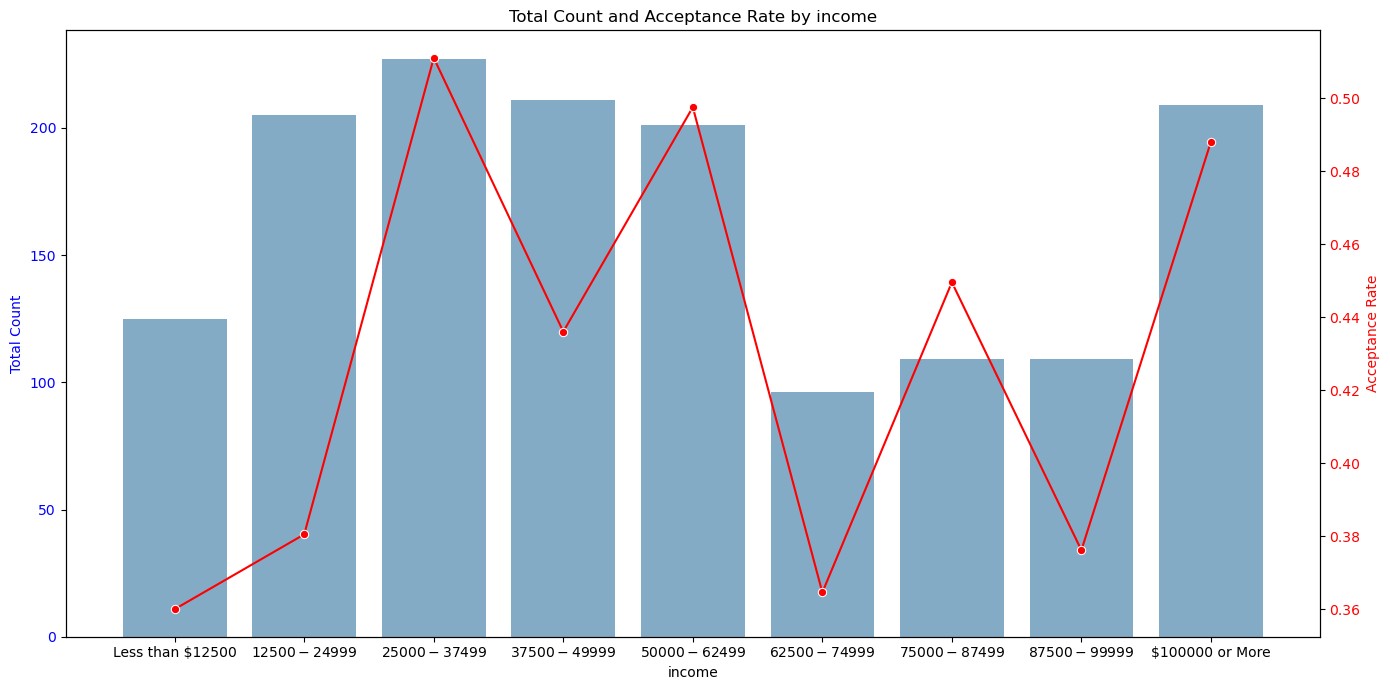

In [72]:
# Create a dataset of 'Restaurant(20-50)' coupon type.

high_end_restaurant = data[data['coupon'] == 'Restaurant(20-50)']

# lets create a map in sorted order so when we plot this data it is in incrementing order.
# Map income ranges to numeric values for sorting
income_mapping = {
    'Less than $12500': 1,
    '$12500 - $24999': 2,
    '$25000 - $37499': 3,
    '$37500 - $49999': 4,
    '$50000 - $62499': 5,
    '$62500 - $74999': 6,
    '$75000 - $87499': 7,
    '$87500 - $99999': 8,
    '$100000 or More': 9
}

high_end_restaurant = high_end_restaurant.assign(income_numeric=high_end_restaurant['income'].map(income_mapping))


#Group the data set by income
grouped = high_end_restaurant.groupby(['income', 'income_numeric'] ).agg(
    count=('Y', 'size'), 
    accepted=('Y', 'sum'), 
    acceptance_rate=('Y', 'mean')
).reset_index()
print(grouped)
grouped = grouped.sort_values('income_numeric')

data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='income', y='count', data=grouped, ax=ax1, alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='income', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by income')
ax1.set_xlabel('income')
plt.savefig("./images/plots/high-end-income.png")
# Show the plot
plt.tight_layout()
plt.show()


**Observation**: The income does not have any signifacant impact on the acceptance ratio for Restaurant(20-50) coupons

  Restaurant20To50  frequency_mapping  count  accepted  acceptance_rate
0              1~3                3.0    383       202         0.527415
1              4~8                4.0     91        57         0.626374
2              gt8                5.0     32        22         0.687500
3            less1                2.0    734       302         0.411444
4            never                1.0    230        68         0.295652


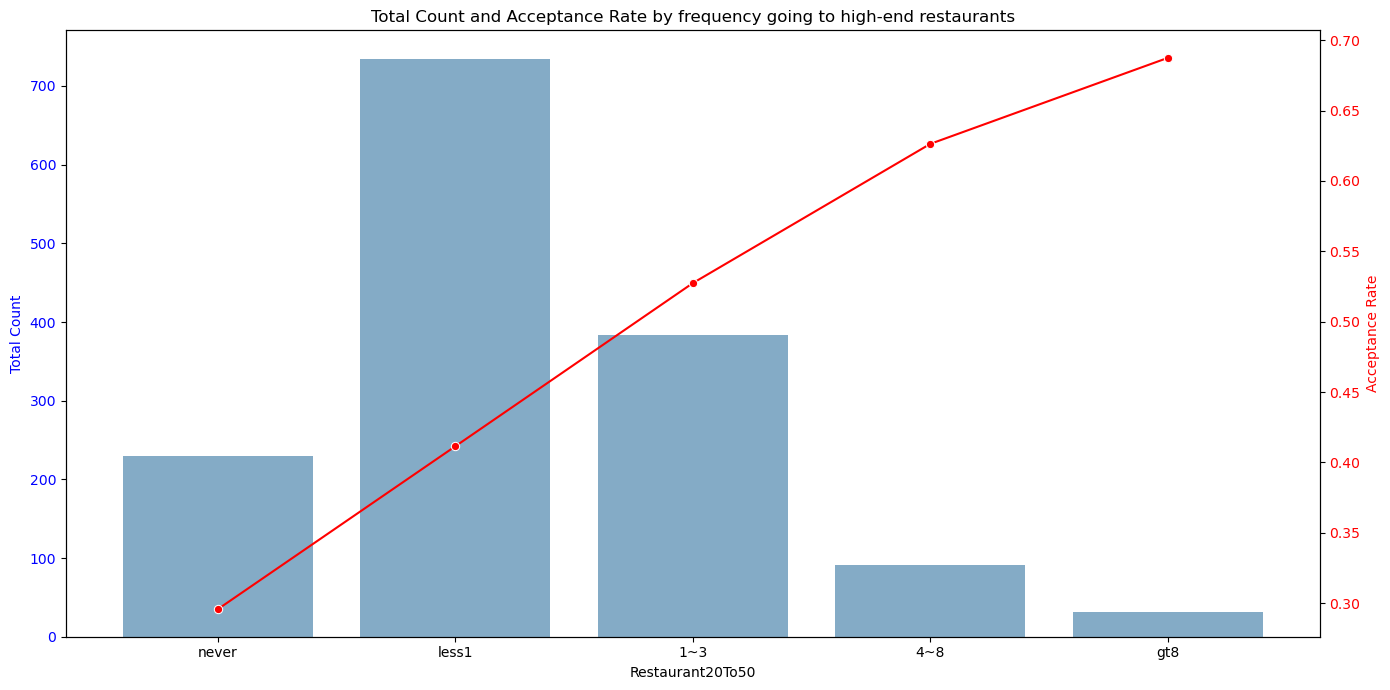

In [75]:
# To have a clean and proper plot we should sort the Restaurant20To50 in the ascending order 
# create a simple map of frequent visit value to numeric
frequency_mapping = {
    'never': 1,
    'less1': 2,
    '1~3': 3,
    '4~8': 4,
    'gt8': 5
}

high_end_restaurant = high_end_restaurant.assign(frequency_mapping=high_end_restaurant['Restaurant20To50'].map(frequency_mapping))


# Group by Restaurant20To50 and calculate the acceptance ratio
grouped = high_end_restaurant.groupby(['Restaurant20To50','frequency_mapping']).agg(
    count=('Y', 'size'), 
    accepted=('Y', 'sum'), 
    acceptance_rate=('Y', 'mean')
).reset_index()
print(grouped)
 
#sort the grouped value by frequency numeric value
grouped = grouped.sort_values('frequency_mapping')

data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='Restaurant20To50', y='count', data=grouped, ax=ax1, alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='Restaurant20To50', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by frequency going to high-end restaurants')
ax1.set_xlabel('Restaurant20To50')

plt.savefig("./images/plots/frequency.png")

# Show the plot
plt.tight_layout()
plt.show()


**Observation**: Those who goes to high end restaurant frequently have high chance of accepting the coupons

   passanger  count  accepted  acceptance_rate
0      Alone   1009       426         0.422200
1  Friend(s)    168        78         0.464286
2     Kid(s)    174        65         0.373563
3    Partner    141        89         0.631206


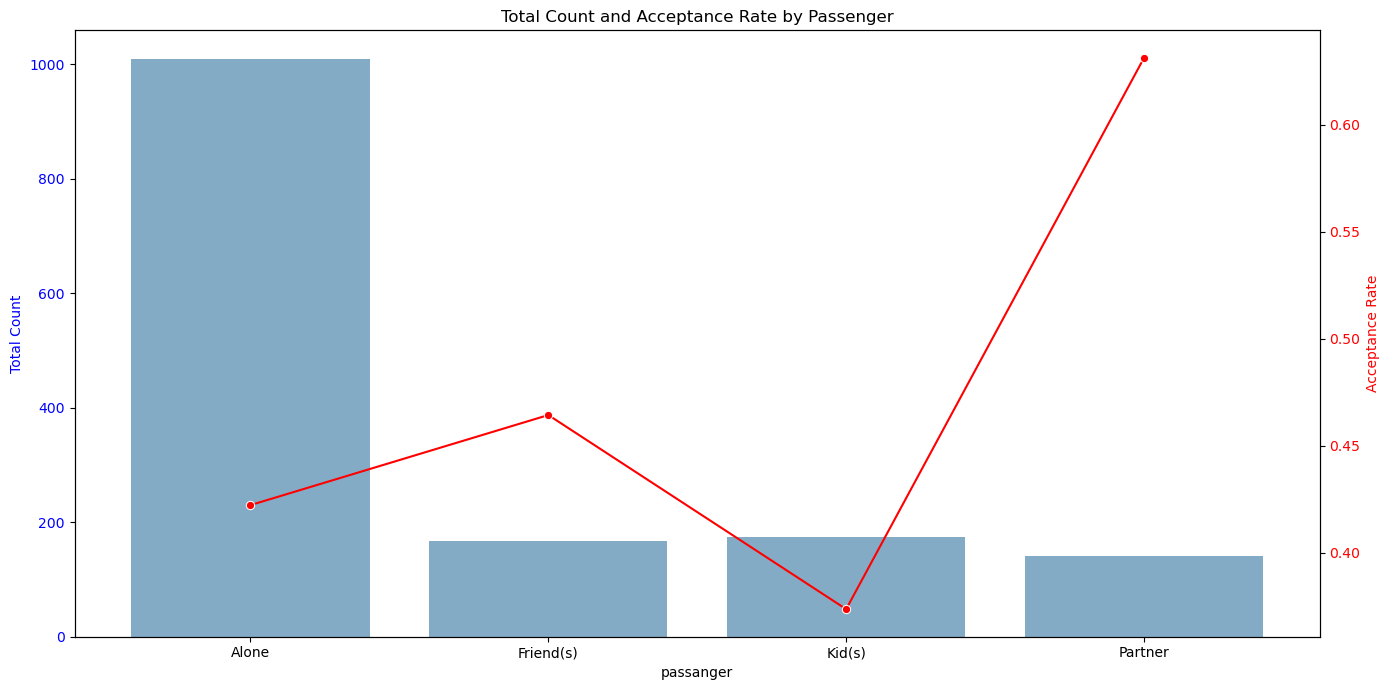

In [78]:
grouped = high_end_restaurant.groupby('passanger').agg(
    count=('Y', 'size'), 
    accepted=('Y', 'sum'), 
    acceptance_rate=('Y', 'mean')
).reset_index()
print(grouped)
# grouped = grouped.sort_values('income_numeric')

data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Plot the grouped data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for count
sns.barplot(x='passanger', y='count', data=grouped, ax=ax1, alpha=0.6)
ax1.set_ylabel('Total Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the acceptance rate
ax2 = ax1.twinx()
sns.lineplot(x='passanger', y='acceptance_rate', data=grouped, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Acceptance Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and labels
plt.title('Total Count and Acceptance Rate by Passenger')
ax1.set_xlabel('passanger')

# Show the plot
plt.tight_layout()
plt.show()

**Observation**: Drivers who are traveling with their partners tend to be more likely to accept coupons for high-end restaurants.

**Summary**:  Drivers who are travelling  with their partners and frequent to high end restaurant have high chance of accepting the coupons. The income of drivers does not have any coorelation to accepting the coupons.

**Next Steps**:

1. **Conduct Comprehensive Analysis of All Coupon Types**: Examine the remaining types of coupons to understand how different attributes affect their acceptance rates.
2. **Develop a Predictive Model**: Create a model using the analyzed data to predict coupon acceptance for each coupon type or based on the attributes predicts which coupon is a good fit for the driver. This way we can promote the business to the right target of customers.
3. **Validate the Model**: Test the model's accuracy and reliability using a separate test dataset.